In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
from collections import Counter
import re

In [2]:
data = pd.read_csv("C:\\Users\\rushy\\Documents\\Fall2019\\RandPython Proj\\Final_Deliverable\\Final_dataset.csv", index_col=0)

In [309]:
data.sample(5)

,job_id,rating,position,company,job_city,job_state_code,sal_low,sal_high,link,description,hq_city,hq_state_code,size,industry
371,3261340591,3.1,data scientist (nlp),Prognos,New York,NY,101.0,142.0,https://www.glassdoor.com/partner/jobListing.h...,Prognos is an NYC-based healthcare startup who...,New York,NY,200,Health Care Services & Hospitals
162,3304548552,3.3,data engineer,"Remedy BPCI Partners, LLC.",New York,NY,82.0,112.0,https://www.glassdoor.com/partner/jobListing.h...,How will this role have an impact?\n\nAs a mem...,Norwalk,CT,500,Health Care Services & Hospitals
152,3347133133,4.3,data engineer,Medidata Solutions,New York,NY,112.0,150.0,https://www.glassdoor.com/partner/jobListing.h...,Medidata: Conquering Diseases Together\n\nWHAT...,New York,NY,5000,Enterprise Software & Network Solutions
381,3305951022,3.8,data scientist,Albert Einstein College of Medicine,Bronx,NY,70.0,103.0,https://www.glassdoor.com/partner/jobListing.h...,POSITION RESPONSIBILITIES\n\n\nResponsibilitie...,Bronx,NY,5000,Colleges & Universities
2,3284284037,2.7,data engineer,COTA,Boston,MA,86.0,117.0,https://www.glassdoor.com/partner/jobListing.h...,POSITION: DATA ENGINEER\n\nABOUT COTA\nCOTA wa...,New York,NY,200,Computer Hardware & Software


In [310]:
data = data.drop(['link'], axis =1)

In [311]:
data.sample(5)

,job_id,rating,position,company,job_city,job_state_code,sal_low,sal_high,description,hq_city,hq_state_code,size,industry
560,3252920071,3.6,"manager, data science",Blink Health,New York,NY,59.0,100.0,Blink Health is a well-funded healthcare techn...,New York,NY,500,Health Care Services & Hospitals
80,3379783823,4.0,data analyst,WalkerHealthcareIT,Detroit,MI,NaN,NaN,"DATA ANALYST, DETROIT, MICHIGAN\n\nWalkerHealt...",Bloomfield Hills,MI,200,Staffing & Outsourcing
220,3325142817,4.1,data engineer,Oloop Technology Solutions,New York,NY,NaN,NaN,"Jobtitle: Data Engineer\nLocation: New York, N...",Aurora,IL,200,Staffing & Outsourcing
182,3250657259,4.0,data engineer,Knotel,New York,NY,88.0,122.0,Knotel is seeking an experienced Data Engineer...,New York,NY,500,Real Estate
510,3205805597,3.0,rmbs data scientist,London Stock Exchange Group,New York,NY,85.0,124.0,FTSE Russell / Yield Book prides itself in set...,London,United Kingdom,5000,Stock Exchanges


In [312]:
data.isnull().values.any()

True

In [313]:
data.isnull().sum()

job_id              0
rating              0
position            0
company             0
job_city           32
job_state_code     32
sal_low           175
sal_high          175
description         0
hq_city             0
hq_state_code       0
size                0
industry            0
dtype: int64

In [314]:
data_null=pd.isnull(data['job_state_code'])

In [315]:
data[data_null]

,job_id,rating,position,company,job_city,job_state_code,sal_low,sal_high,description,hq_city,hq_state_code,size,industry
28,3318225561,3.8,data engineer,Capital One,NaN,NaN,90.0,123.0,"1 Broadway (21026), United States of America, ...",Mc Lean,VA,10000,Banks & Credit Unions
66,3365248211,3.6,data engineer,Comau LLC,NaN,NaN,65.0,90.0,Comau LLC is now creating a new team focused o...,Grugliasco,Italy,10000,Industrial Manufacturing
73,3317344619,2.8,software engineer,Mitsubishi Electric,NaN,NaN,59.0,103.0,Mitsubishi Electric Automotive America creates...,Mason,OH,5000,Transportation Equipment Manufacturing
77,3349197179,0.0,data engineer,Global Information Technology,NaN,NaN,60.0,84.0,Job Code ATL - 341\nJob Title Data Engineer\nL...,Tampa,FL,200,IT Services
130,3391739330,3.3,software engineer,Amtec Inc.,NaN,NaN,50.0,87.0,Job Description\nJOB DESCRIPTION\n\nThe candid...,Elgin,IL,500,Industrial Manufacturing
143,3345597620,3.5,entry level software development engineer 2019...,Audible,NaN,NaN,100.0,131.0,Come and be part of a great Audible team on th...,Newark,NJ,5000,Motion Picture Production & Distribution
177,3319618262,3.2,data engineer,Sapphire Digital,NaN,NaN,75.0,104.0,Sapphire Digital seeks a dynamic and driven mi...,Lyndhurst,NJ,500,Internet
196,3388042390,3.2,data engineer,Caresoft,NaN,NaN,80.0,110.0,Title: Hadoop Developer/Data EngineerLocation:...,Middlesex,NJ,50,Computer Hardware & Software
231,3380009451,5.0,data engineer,"Techlink, Inc.",NaN,NaN,108.0,146.0,Job Title: Sr. Data EngineerLocation: Northern...,Atlanta,GA,50,Staffing & Outsourcing
343,3227144875,3.4,data scientist,United Technologies,NaN,NaN,92.0,133.0,Date Posted:\n\n2019-05-08-07:00\n\nCountry:\n...,Farmington,CT,10000,Aerospace & Defense


In [316]:
data = data.dropna(axis=0, subset=['job_state_code'])

In [317]:
data.isnull().sum()

job_id              0
rating              0
position            0
company             0
job_city            0
job_state_code      0
sal_low           171
sal_high          171
description         0
hq_city             0
hq_state_code       0
size                0
industry            0
dtype: int64

In [318]:
data.dtypes

job_id              int64
rating            float64
position           object
company            object
job_city           object
job_state_code     object
sal_low           float64
sal_high          float64
description        object
hq_city            object
hq_state_code      object
size                int64
industry           object
dtype: object

In [319]:
avg_low_sal=data.groupby('job_state_code')[['sal_low']].mean()

In [320]:
avg_low_sal

,sal_low
job_state_code,
MA,81.173913
MI,69.859649
NY,91.989510
TX,90.684211


In [321]:
avg_high_sal=data.groupby('job_state_code')[['sal_high']].mean()

In [322]:
avg_high_sal

,sal_high
job_state_code,
MA,115.695652
MI,103.719298
NY,132.062937
TX,122.526316


In [323]:
data['sal_low'] = data['sal_low'].fillna(data.groupby('job_state_code')['sal_low'].transform('mean'))

In [324]:
data['sal_high'] = data['sal_high'].fillna(data.groupby('job_state_code')['sal_high'].transform('mean'))

In [325]:
data.isnull().sum()

job_id            0
rating            0
position          0
company           0
job_city          0
job_state_code    0
sal_low           0
sal_high          0
description       0
hq_city           0
hq_state_code     0
size              0
industry          0
dtype: int64

In [326]:
data['sal_mid'] = (data['sal_low']+data['sal_high'])/2

In [327]:
data.head()

,job_id,rating,position,company,job_city,job_state_code,sal_low,sal_high,description,hq_city,hq_state_code,size,industry,sal_mid
0,3381578119,3.9,data engineer,Seniorlink,Boston,MA,64.0,89.0,Position Summary:\n\n\nThe Data Engineer will ...,Boston,MA,500,Health Care Services & Hospitals,76.5
1,3320321158,3.6,data engineer,Blue Cross and Blue Shield of Massachusetts,Boston,MA,83.0,113.0,Ready to help us transform healthcare? Bring y...,Boston,MA,5000,Insurance Carriers,98.0
2,3284284037,2.7,data engineer,COTA,Boston,MA,86.0,117.0,POSITION: DATA ENGINEER\n\nABOUT COTA\nCOTA wa...,New York,NY,200,Computer Hardware & Software,101.5
3,3298422474,4.0,"data engineer, data intelligence",Indigo,Boston,MA,100.0,136.0,"Indigo improves grower profitability, environm...",Boston,MA,5000,Farm Support Services,118.0
4,3352031827,4.3,data application engineer,CarGurus,Cambridge,MA,61.0,93.0,Meet CarGurus—the #1 visited online car shoppi...,Cambridge,MA,1000,Internet,77.0


In [328]:
data.shape

(579, 14)

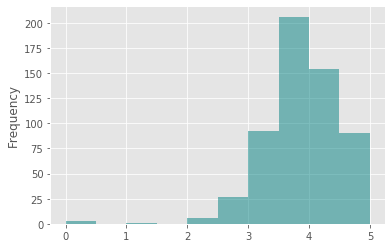

In [330]:
data['rating'].plot.hist(alpha=0.5,color='teal')

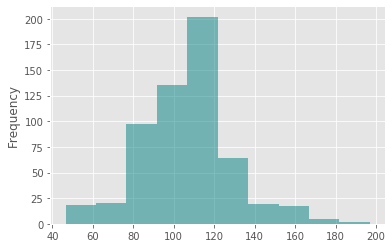

In [331]:
data['sal_mid'].plot.hist(alpha=0.5,color='teal')

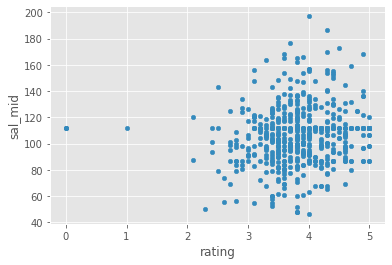

In [332]:
data.plot.scatter(x='rating', y='sal_mid')

In [333]:
# Industries which offer more jobs

Industry_jobs = data.groupby('industry')['job_id'].count().sort_values(ascending = False)
pd.DataFrame({'count':Industry_jobs})

,count
industry,
Internet,77
IT Services,55
Staffing & Outsourcing,48
Computer Hardware & Software,47
Enterprise Software & Network Solutions,44
...,...
Grocery Stores & Supermarkets,1
Health Care Products Manufacturing,1
Video Games,1


In [334]:
#mean salary industry-wise
data.groupby('industry').sal_mid.mean()[:10].sort_values(ascending = False)

industry
Biotech & Pharmaceuticals                113.582667
Banks & Credit Unions                    111.503278
Accounting                               109.932318
Brokerage Services                       109.263112
Aerospace & Defense                      108.513112
Advertising & Marketing                   98.916690
Beauty & Personal Accessories Stores      96.500000
Building & Personnel Services             88.644737
Cable, Internet & Telephone Providers     85.394737
Architectural & Engineering Services      82.263112
Name: sal_mid, dtype: float64

Text(0, 0.5, 'Mean Salary')

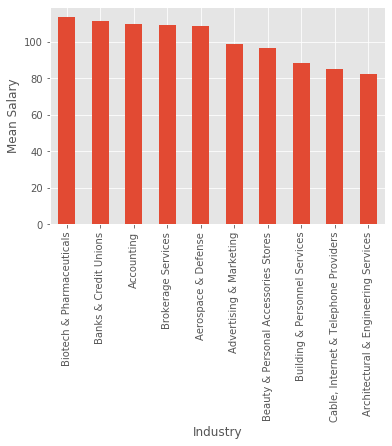

In [335]:
# Industries according highest average salary

data.groupby('industry').sal_mid.mean()[:10].sort_values(ascending = False)[:10].plot.bar()
plt.xlabel('Industry')
plt.ylabel('Mean Salary')

Text(0, 0.5, 'State')

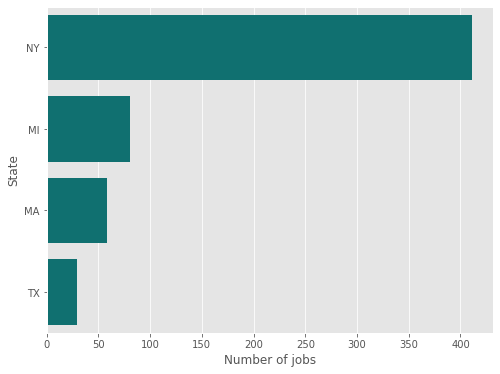

In [336]:
# Which state offers more jobs
plt.rcParams['figure.figsize'] = 8,6
g2  = sns.barplot(data.job_state_code.value_counts().values[:10], data.job_state_code.value_counts().index[:10], color='teal') #top ten sectors
plt.xlabel('Number of jobs')
plt.ylabel('State')

Text(0.5, 0, 'States')

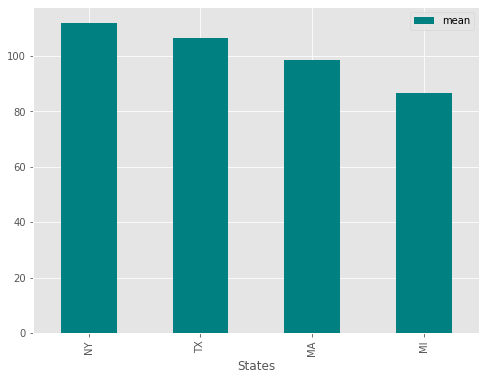

In [343]:
#MEAN SALARY FOR STATES (groupby state)
Salary_by_State = data.groupby('job_state_code').sal_mid.agg([np.mean]).sort_values(
    'mean', ascending = False).plot(kind='bar',color='teal')
plt.xlabel('States')

Text(0, 0.5, 'Industry')

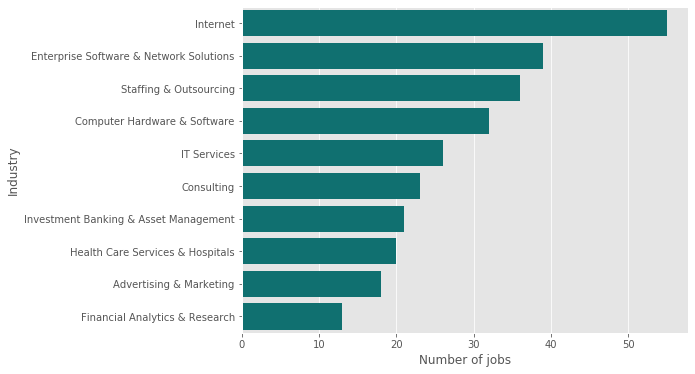

In [337]:
#which industry offers most jobs?
g = sns.barplot(data[data.job_state_code=='NY'].industry.value_counts().values[:10], 
                 data[data.job_state_code=='NY'].industry.value_counts().index[:10], color ='teal') #top ten sectors

plt.xlabel('Number of jobs')
plt.ylabel('Industry')

Text(0.5, 0, 'Number of jobs')

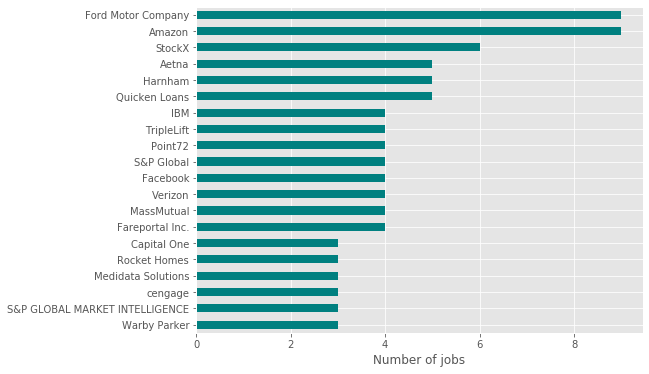

In [338]:
#top companies hiring
data['company'].value_counts().head(20)[::-1].plot.barh(color='teal')
plt.xlabel('Number of jobs')

In [339]:
# Top 5 companies with highest number of job postings
top_company = data['company'].value_counts().head(200)
top_company = top_company.to_frame().reset_index()
top_company.columns = ['company','count']
top_company.head()

,company,count
0,Ford Motor Company,9
1,Amazon,9
2,StockX,6
3,Aetna,5
4,Harnham,5


In [354]:
data.groupby('industry').mean().sort_values(by='sal_mid',ascending=False)

,job_id,rating,sal_low,sal_high,size,sal_mid
industry,,,,,,
Telecommunications Services,3.340944e+09,3.600000,127.247378,172.515734,10000.000000,149.881556
General Merchandise & Superstores,3.287344e+09,3.750000,111.494755,156.531469,2600.000000,134.013112
Research & Development,3.343430e+09,3.466667,104.663170,148.354312,150.000000,126.508741
Farm Support Services,3.011729e+09,4.000000,104.000000,141.500000,5000.000000,122.750000
Oil & Gas Exploration & Production,3.320888e+09,3.900000,99.000000,143.000000,10000.000000,121.000000
...,...,...,...,...,...,...
"Cable, Internet & Telephone Providers",3.375238e+09,2.850000,68.929825,101.859649,5100.000000,85.394737
Colleges & Universities,3.349868e+09,3.950000,67.000000,100.000000,7533.333333,83.500000
Health Care Products Manufacturing,3.246518e+09,3.100000,69.000000,97.000000,5000.000000,83.000000


In [357]:
data.groupby('industry').mean().sort_values(by='rating',ascending=False)

,job_id,rating,sal_low,sal_high,size,sal_mid
industry,,,,,,
Food Production,3.290545e+09,4.850,91.989510,132.062937,50.00,112.026224
"Hotels, Motels, & Resorts",3.342286e+09,4.700,91.989510,132.062937,200.00,112.026224
Real Estate,3.296779e+09,4.325,70.623689,102.132867,456.25,86.378278
Wholesale,3.141809e+09,4.200,66.000000,98.000000,200.00,82.000000
Grocery Stores & Supermarkets,3.288809e+09,4.200,87.000000,117.000000,10000.00,102.000000
...,...,...,...,...,...,...
Radio,3.388726e+09,3.000,76.000000,106.000000,5000.00,91.000000
Building & Personnel Services,3.354041e+09,3.000,71.429825,105.859649,5025.00,88.644737
Food & Beverage Stores,3.352466e+09,3.000,79.000000,112.000000,5000.00,95.500000


Text(0.5, 0, 'Salary (1000 $)')

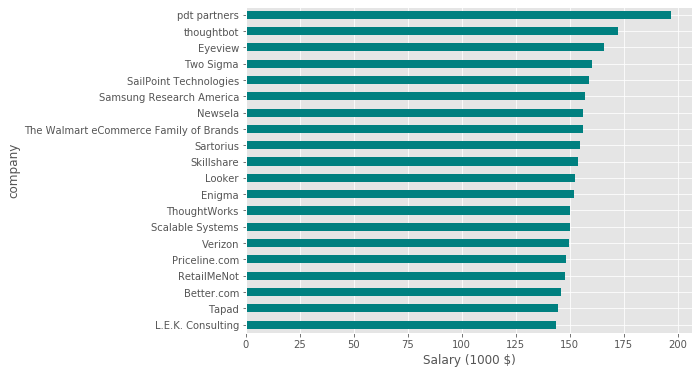

In [340]:
# Top companies based on the salary offered

data.groupby('company')['sal_mid'].mean().sort_values(ascending = False)[:20][::-1].plot.barh(color='teal')
plt.xlabel('Salary (1000 $)')

3.7996545768566494
223 65 249


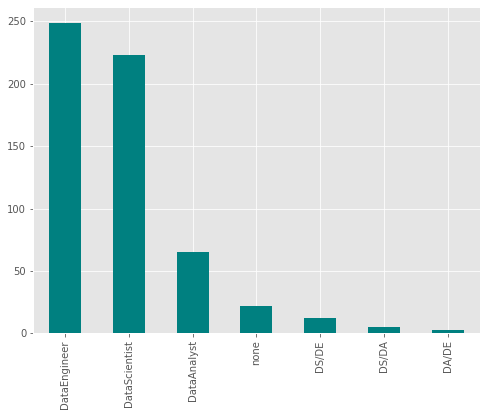

In [387]:
# No. of jobs in each category

job_dict = {}
job_dict ={'DS':"(scientist|science)",
                'DE' : "(engineer|developer)",
                'DA':"analyst"         
          }
data['DS'] = data['position'].apply(lambda x: len(re.findall(job_dict['DS'],x))>0 )
data['DA'] = data['position'].apply(lambda x: len(re.findall(job_dict['DA'],x))>0 )
data['DE'] = data['position'].apply(lambda x: len(re.findall(job_dict['DE'],x))>0 )
data.shape[0]
data.DS.sum(), data.DA.sum(), data.DE.sum()
data[data.DS].shape[0], data[data.DA].shape[0], data[data.DE].shape[0]

#job title does not include analyst, scientist or engineer
data_none  = data[np.logical_and(np.logical_and(data.DS ==False, data.DA ==False), data.DE ==False)]

data_DS_only = data[np.logical_and(np.logical_and(data.DE ==False, data.DA ==False), data.DS ==True)]
data_DA_only = data[np.logical_and(np.logical_and(data.DS ==False, data.DE ==False), data.DA ==True)]
data_DE_only = data[np.logical_and(np.logical_and(data.DS ==False, data.DA ==False), data.DE ==True)]
print(data_none.shape[0]/data.shape[0] *100)
print(data_DS_only.shape[0], data_DA_only.shape[0], data_DE_only.shape[0])

data_none['position'].head(10)

data['job_code'] = 100*data.DS + 10*data.DE + data.DA
data['job_code'] = data['job_code'].astype('category')
data['job_code'] = data['job_code'].cat.rename_categories({
    100: 'DataScientist',
    10: 'DataEngineer',
    1: 'DataAnalyst',
    0: 'none',
    110:'DS/DE',
    101:'DS/DA',
    11:'DA/DE',
    111:'DS/DA/DE'
                }) 
data['job_code'].value_counts()

data['job_code'].value_counts().plot.bar(color ='teal')

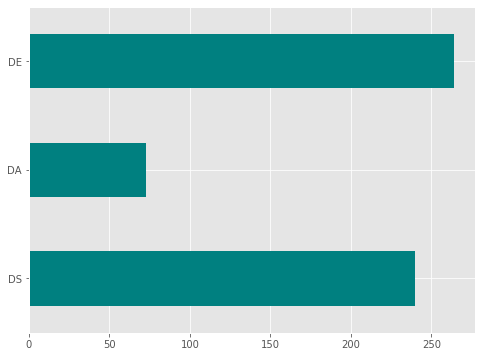

In [388]:
data[['DS','DA','DE']].sum().plot.barh(color ='teal')

python  :  28
r  :  578
java  :  4
c++  :  0
sql  :  6
excel  :  113
scala  :  133
stata  :  0
sas  :  9
spark  :  17
hadoop  :  3
cloudera  :  0
mongodb  :  0
tableau  :  0
hive  :  5
tensorflow  :  2
django  :  0
aws  :  32
mahout  :  0
matlab  :  0
cassandra  :  0
mapreduce  :  1


Text(0, 0.5, 'Number of jobs')

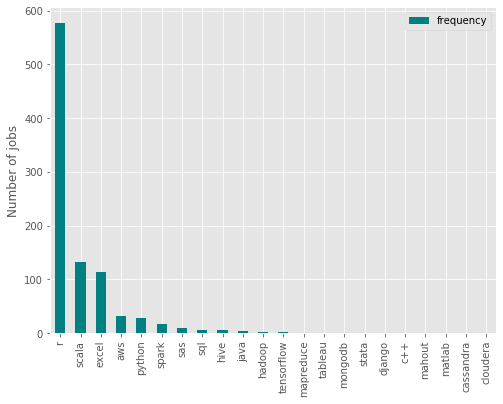

In [302]:
data.description.head()
data['description'].apply(lambda x: "hadoop" in x).head()
data['description'].apply(lambda x: "hadoop" in x).sum()
data['description'].apply(lambda x: "hadoop"  not in x).sum()

def tool_freq(tool):
    return data['description'].apply(lambda x: tool in x).sum()

tools = ['python','r','java','c++','sql','excel','scala','stata','sas','spark','hadoop',
         'cloudera','mongodb','tableau','hive','tensorflow','django','aws','mahout','matlab','cassandra','mapreduce'] #'bokeh','clojure'

skill_dict = {}
for tool in tools:
    print(tool,' : ',tool_freq(tool))
    skill_dict[tool] = tool_freq(tool)
    
skill_dict

data_job = pd.DataFrame.from_dict(skill_dict, orient='index')
data_job.columns = ['frequency']
data_job.head()

dummy = data_job.sort_values(by ='frequency', ascending = False).plot(kind ='bar', color ='teal')
plt.ylabel('Number of jobs')

In [382]:
edus = ['bs','b.s.','bsc','b.s.c','b.sc.','ba','b.a.','Bachelors','undergrad','undergraduate','associate',
       'ms','m.s.','msc','m.s.c','m.sc.','ma','m.a.','master','Masters','graduate',
       'phd','ph.d.','ph.d','advanced','doctoral','doctorate','post-graduate']

edu_dict = {}
for edu in edus:
    print(edu,' : ',tool_freq(edu))
    edu_dict[edu] = tool_freq(edu)

bs  :  170
b.s.  :  0
bsc  :  30
b.s.c  :  0
b.sc.  :  0
ba  :  530
b.a.  :  0
Bachelors  :  40
undergrad  :  3
undergraduate  :  3
associate  :  30
ms  :  533
m.s.  :  0
msc  :  1
m.s.c  :  0
m.sc.  :  0
ma  :  567
m.a.  :  0
master  :  34
Masters  :  52
graduate  :  22
phd  :  0
ph.d.  :  0
ph.d  :  0
advanced  :  126
doctoral  :  4
doctorate  :  1
post-graduate  :  0


python  :  28
r  :  578
java  :  4
c++  :  0
sql  :  6
excel  :  113
scala  :  133
stata  :  0
sas  :  9
spark  :  17
hadoop  :  3
cloudera  :  0
mongodb  :  0
tableau  :  0
hive  :  5
tensorflow  :  2
django  :  0
aws  :  32
mahout  :  0
matlab  :  0
cassandra  :  0
mapreduce  :  1


Text(0, 0.5, 'Number of jobs')

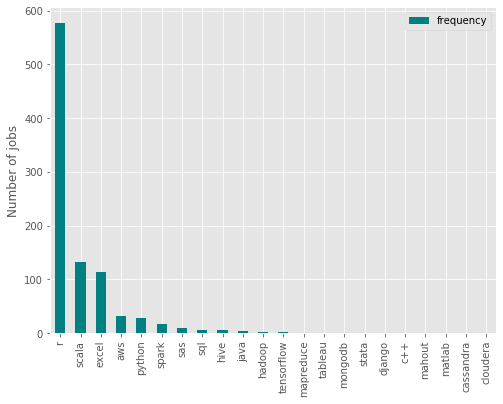

In [384]:
data.description.head()
data['description'].apply(lambda x: "hadoop" in x).head()
data['description'].apply(lambda x: "hadoop" in x).sum()
data['description'].apply(lambda x: "hadoop"  not in x).sum()

def tool_freq(tool):
    return data['description'].apply(lambda x: tool in x).sum()

tools = ['python','r','java','c++','sql','excel','scala','stata','sas','spark','hadoop',
         'cloudera','mongodb','tableau','hive','tensorflow','django','aws','mahout','matlab','cassandra','mapreduce'] #'bokeh','clojure'

skill_dict = {}
for tool in tools:
    print(tool,' : ',tool_freq(tool))
    skill_dict[tool] = tool_freq(tool)
    
skill_dict

df_job = pd.DataFrame.from_dict(skill_dict, orient='index')
df_job.columns = ['frequency']
df_job.head()

dummy = df_job.sort_values(by ='frequency', ascending = False).plot(kind ='bar', color ='teal')
plt.ylabel('Number of jobs')

In [6]:
#Finding mean, median, standard deviation, minimum and maximum for all numeric variables in our data
#Numerical Variable 1 : rating
round(data.groupby('job_state_code')['rating'].mean(),2)

job_state_code
MA    0.56
MI    0.56
NY    0.68
TX    0.46
Name: rating, dtype: float64

In [7]:
round(data.groupby('job_state_code')['rating'].median(),2)

job_state_code
MA    3.7
MI    3.9
NY    3.8
TX    4.0
Name: rating, dtype: float64

In [8]:
round(data.groupby('job_state_code')['rating'].max(),2)

job_state_code
MA    5.0
MI    5.0
NY    5.0
TX    5.0
Name: rating, dtype: float64

In [9]:
round(data.groupby('job_state_code')['rating'].min(),2)

job_state_code
MA    2.6
MI    2.3
NY    0.0
TX    3.0
Name: rating, dtype: float64

In [10]:
round(data.groupby('job_state_code')['rating'].std(),2)

job_state_code
MA    0.56
MI    0.56
NY    0.68
TX    0.46
Name: rating, dtype: float64

In [12]:
#Numerical Variable 2 : sal_low
round(data.groupby('job_state_code')['sal_low'].mean(),2)

job_state_code
MA    81.17
MI    69.86
NY    91.99
TX    90.68
Name: sal_low, dtype: float64

In [13]:
round(data.groupby('job_state_code')['sal_low'].median(),2)

job_state_code
MA    81.17
MI    69.86
NY    91.99
TX    90.68
Name: sal_low, dtype: float64

In [14]:
round(data.groupby('job_state_code')['sal_low'].max(),2)

job_state_code
MA    126.0
MI    106.0
NY    154.0
TX    142.0
Name: sal_low, dtype: float64

In [15]:
round(data.groupby('job_state_code')['sal_low'].min(),2)

job_state_code
MA    44.0
MI    35.0
NY    41.0
TX    37.0
Name: sal_low, dtype: float64

In [16]:
round(data.groupby('job_state_code')['sal_low'].std(),2)

job_state_code
MA    15.85
MI    14.31
NY    17.94
TX    23.12
Name: sal_low, dtype: float64

In [17]:
#Numeric variable 3 : sal_high
round(data.groupby('job_state_code')['sal_high'].mean(),2)

job_state_code
MA    115.70
MI    103.72
NY    132.06
TX    122.53
Name: sal_high, dtype: float64

In [18]:
round(data.groupby('job_state_code')['sal_high'].median(),2)

job_state_code
MA    115.70
MI    103.72
NY    132.06
TX    122.53
Name: sal_high, dtype: float64

In [19]:
round(data.groupby('job_state_code')['sal_high'].max(),2)

job_state_code
MA    171.0
MI    161.0
NY    243.0
TX    183.0
Name: sal_high, dtype: float64

In [20]:
round(data.groupby('job_state_code')['sal_high'].min(),2)

job_state_code
MA    67.0
MI    58.0
NY    69.0
TX    59.0
Name: sal_high, dtype: float64

In [21]:
round(data.groupby('job_state_code')['sal_high'].std(),2)

job_state_code
MA    20.78
MI    19.33
NY    23.41
TX    27.98
Name: sal_high, dtype: float64

In [27]:
#Numerical variable 4 : size
round(data.groupby('job_state_code')['size'].mean(),2)

In [23]:
round(data.groupby('job_state_code')['size'].median(),2)

job_state_code
MA    1000
MI    1000
NY    1000
TX    1000
Name: size, dtype: int64

In [24]:
round(data.groupby('job_state_code')['size'].max(),2)

job_state_code
MA    10000
MI    10000
NY    10000
TX    10000
Name: size, dtype: int64

In [25]:
round(data.groupby('job_state_code')['size'].min(),2)

job_state_code
MA    50
MI    50
NY    50
TX    50
Name: size, dtype: int64

In [26]:
round(data.groupby('job_state_code')['size'].std(),2)

job_state_code
MA    3820.80
MI    4446.35
NY    4075.33
TX    3914.00
Name: size, dtype: float64

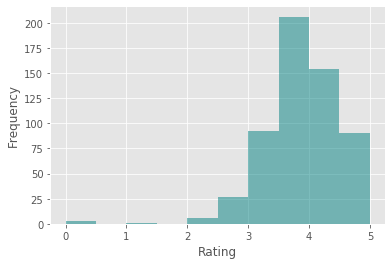

In [34]:
#Histograms of numeric variables
#Numerical variable 1: Rating
plt.xlabel('Rating')
data['rating'].plot.hist(alpha=0.5, color="teal")

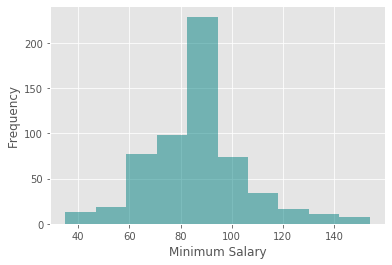

In [35]:
plt.xlabel('Minimum Salary')
data['sal_low'].plot.hist(alpha=0.5,color="teal")

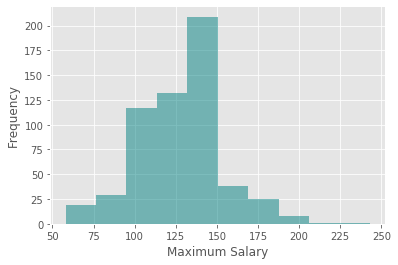

In [36]:
plt.xlabel('Maximum Salary')
data['sal_high'].plot.hist(alpha=0.5,color="teal")

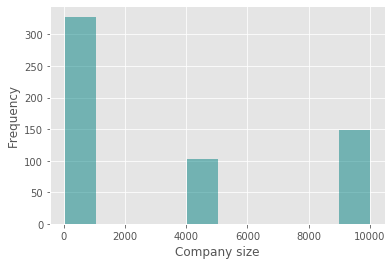

In [37]:
plt.xlabel('Company size')
data['size'].plot.hist(alpha=0.5,color="teal")

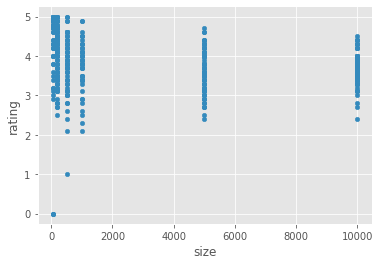

In [41]:
data.plot.scatter(x='size', y='rating')